<div class=" alert alert-block alert-success">
    <h1><b>STOCK Prediction LSTM Model</b></h1>
</div>

                                                                                                          ~ Prayag Bhatt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start_date = '2010-01-01'
end_date = '2022-12-31'
symbol = 'MSFT'

data = yf.download(symbol, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200


In [4]:
# resetting the index
data = data.reset_index()

# removing unecessary columns
data = data.drop(['Date','Adj Close'],axis= 1 )

In [5]:
data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


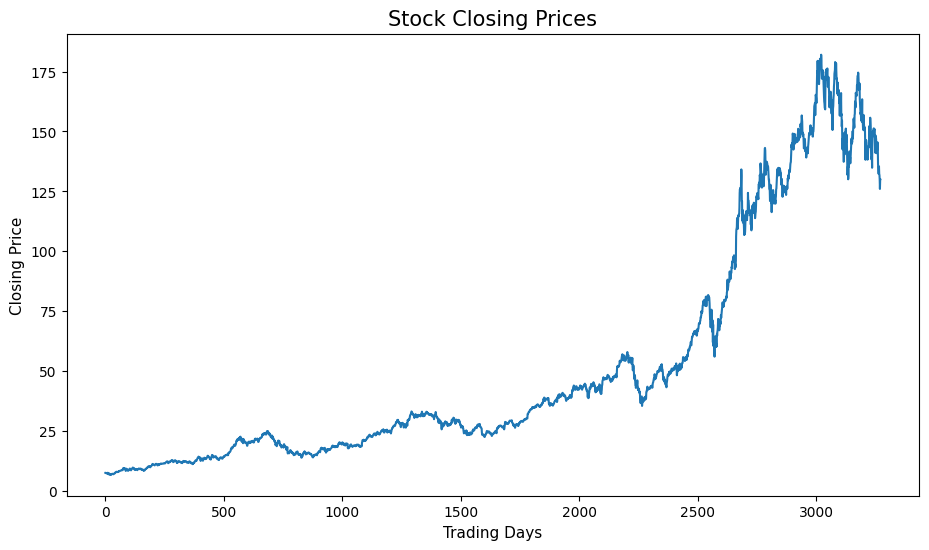

In [6]:
plt.figure(figsize=(11,6))
plt.title('Stock Closing Prices',fontsize = 15)
plt.xlabel('Trading Days',fontsize = 11)
plt.ylabel('Closing Price',fontsize = 11)
plt.plot(data.Close)


### Finding 100 Days Moving Average (MA) 
- Finding mean of previous 100 closing values

In [7]:
moving_avg100 = data.Close.rolling(100).mean()
moving_avg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

### Plotting Closing Prices *vs* 100MA  

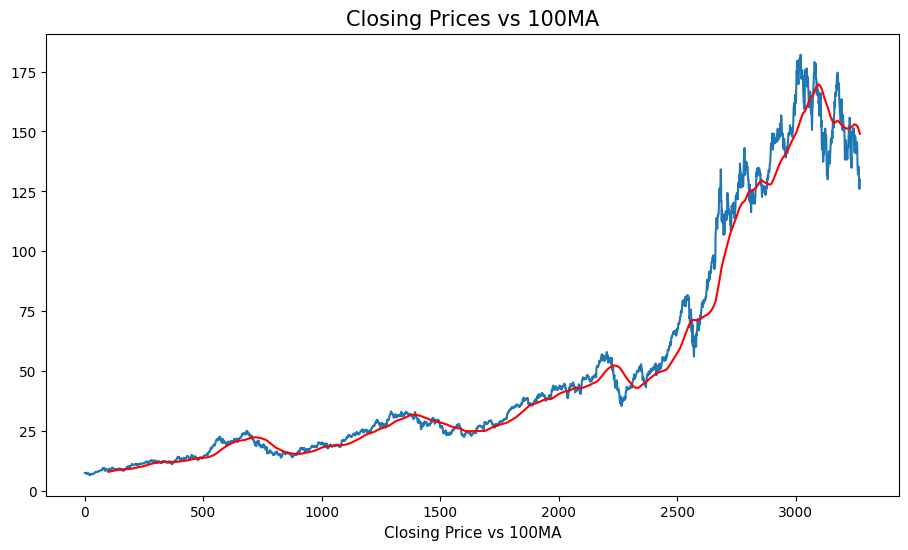

In [8]:
plt.figure(figsize=(11,6))
plt.title('Closing Prices vs 100MA',fontsize = 15)
plt.xlabel('Closing Price vs 100MA',fontsize = 11)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')


### Plotting 100 and 200 days moving days

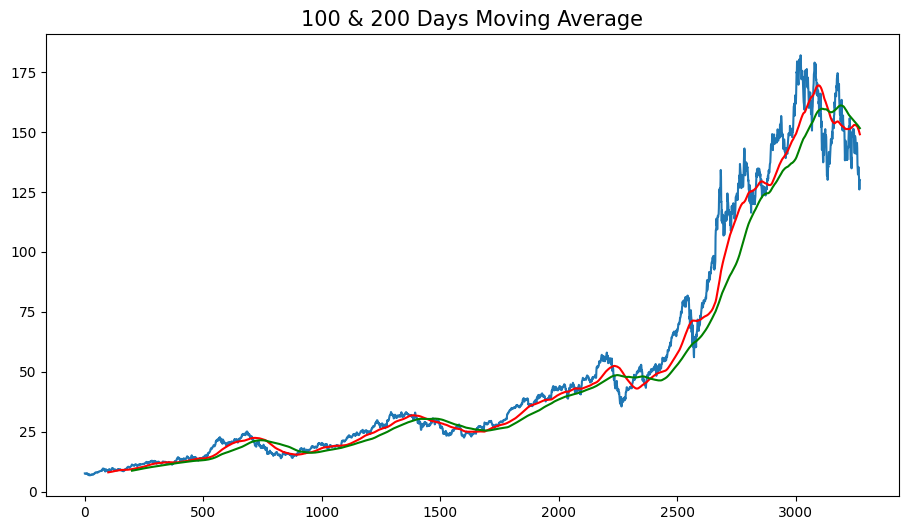

In [9]:
moving_avg200 = data.Close.rolling(200).mean()
plt.figure(figsize=(11,6))
plt.title('100 & 200 Days Moving Average',fontsize=15)
plt.plot(data.Close)
plt.plot(moving_avg100, 'red')
plt.plot(moving_avg200, 'green')

In [10]:
data.shape

(3272, 5)

In [11]:
# Splitting the dataset into training and testing data

data_training = pd.DataFrame(data['Close'][0: int(len(data) * 0.7)])
data_testing  = pd.DataFrame(data['Close'][int(len(data)*0.7) : int(len(data))])

data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [12]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)

In [15]:
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

## LSTM Model

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu' , return_sequences= True, input_shape= (x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1)) # connect all the layers

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [21]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit( x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 17s 196ms/step - loss: 0.0256
Epoch 2/50
69/69 [==============================] - 12s 179ms/step - loss: 0.0066
Epoch 3/50
69/69 [==============================] - 13s 181ms/step - loss: 0.0056
Epoch 4/50
69/69 [==============================] - 12s 179ms/step - loss: 0.0049
Epoch 5/50
69/69 [==============================] - 12s 179ms/step - loss: 0.0047
Epoch 6/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0043
Epoch 7/50
69/69 [==============================] - 13s 183ms/step - loss: 0.0036
Epoch 8/50
69/69 [==============================] - 13s 186ms/step - loss: 0.0041
Epoch 9/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0045
Epoch 10/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0037
Epoch 11/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0032
Epoch 12/50
69/69 [==============================] - 13s 181ms/step - loss: 0.0030
Epoch 13/50
6

In [22]:
model.save('keras_stock_prediction_model.keras')

## Testing

In [23]:
prev_100_days = data_training.tail(100)
prev_100_days

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [33]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [24]:
new_df = pd.concat([prev_100_days,data_testing], ignore_index=True)
new_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [25]:
input_data = scaler.fit_transform(new_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [41]:
input_data.shape

(1082, 1)

In [26]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [27]:
# converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

In [28]:
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [29]:
# making predictions (y-hat)

y_predicted = model.predict(x_test)
y_predicted.shape

31/31 [==============================] - 2s 55ms/step


(982, 1)

In [30]:
# scale up the values
scaler.scale_  # returns the scalability factor

array([0.00682769])

In [31]:
mul_by_fac = 1 / 0.00682769
y_test = y_test * mul_by_fac
y_predicted = y_predicted * mul_by_fac

## Plotting the Original vs Predicted graph

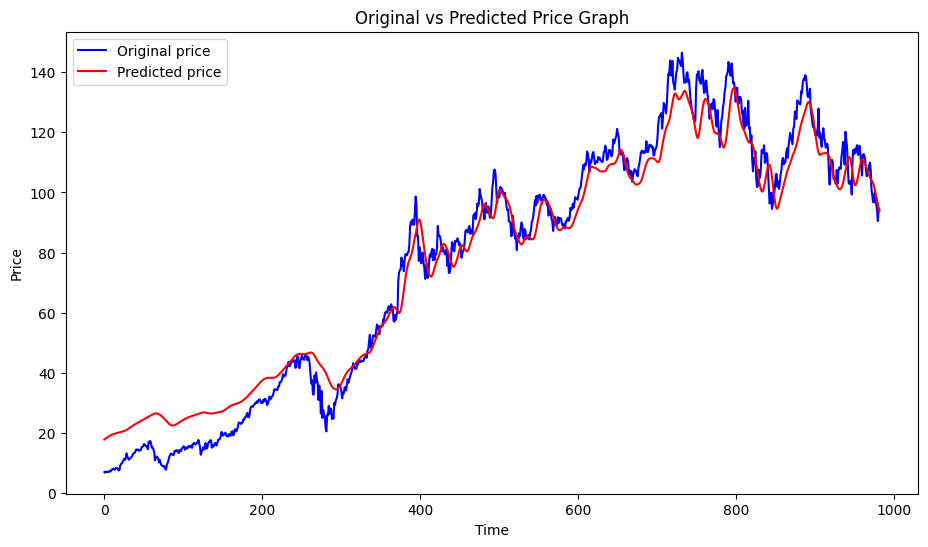

In [32]:
plt.figure(figsize=(11,6))
plt.title('Original vs Predicted Price Graph')
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time' , fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.legend()
plt.show()